<a href="https://colab.research.google.com/github/Sowmya-akurathi/brain_tumor_detection-using_CNN/blob/main/brain_tumor_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


In [15]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
# Set the path to your dataset
dataset_path = '/content/drive/My Drive/brain_tumor_dataset'  # Adjust this if necessary


In [18]:
# Verify the contents of the dataset folder
print(os.listdir(dataset_path))
print(os.listdir(os.path.join(dataset_path, 'Training')))
print(os.listdir(os.path.join(dataset_path, 'Validation')))


['Validation', 'Training']
['Tumor', 'healthy']
['Tumor', 'healthy']


In [21]:
img_height, img_width = 150, 150  # You can adjust these sizes as needed
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Training'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Change to 'categorical' if you have more than 2 classes
)

validation_generator = val_datagen.flow_from_directory(
    os.path.join(dataset_path, 'Validation'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Change to 'categorical' if you have more than 2 classes
)


Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Use 'softmax' for multiple classes
])


In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Change to 'categorical_crossentropy' for multiple classes
              metrics=['accuracy'])


In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,  # Adjust the number of epochs as necessary
    callbacks=[early_stopping]
)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6299 - loss: 1.2848

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 98s 14s/step - accuracy: 0.6319 - loss: 1.2410 - val_accuracy: 0.7549 - val_loss: 0.5696
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7627 - loss: 0.5566 - val_accuracy: 0.7945 - val_loss: 0.4784
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8157 - loss: 0.5012 - val_accuracy: 0.7431 - val_loss: 0.5327
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7969 - loss: 0.4891 - val_accuracy: 0.8261 - val_loss: 0.4361
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7852 - loss: 0.4711 - val_accuracy: 0.8379 - val_loss: 0.4226
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8310 - loss: 0.3946 - val_accuracy: 0.8696 - val_loss: 0.3356
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8411 - loss: 0.3721 - val_accuracy: 0.8656 - val_loss: 0.2935
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8891 - loss: 0.2917 - val_accuracy: 0.9249 - val_loss: 0.1907
Epoch 9/10
8/8 ━━━

In [28]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {loss:.4f}, Validation accuracy: {accuracy:.4f}')


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step - accuracy: 0.9671 - loss: 0.0930
Validation loss: 0.0964, Validation accuracy: 0.9644


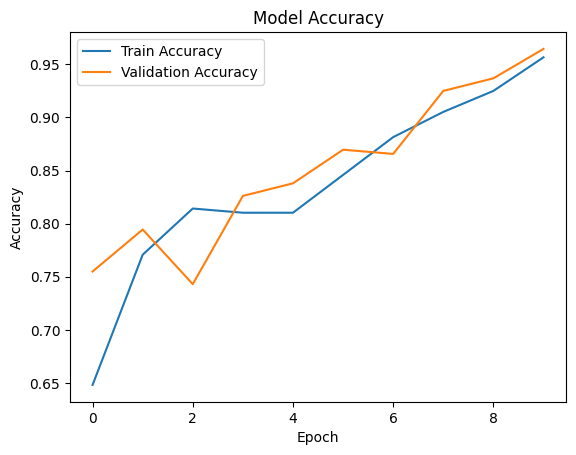

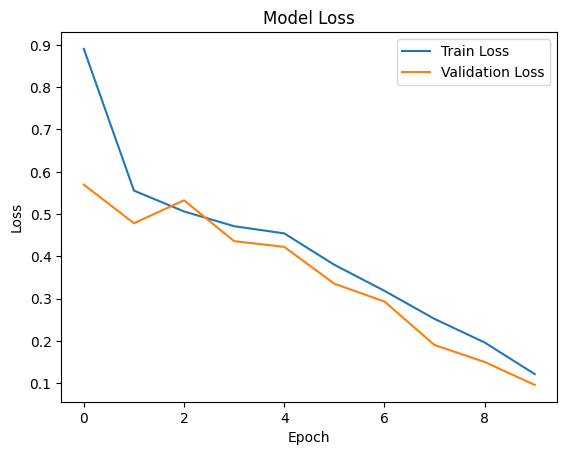

In [29]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [34]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [31]:
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    # Load the image
    img = load_img(img_path, target_size=target_size)
    # Convert the image to an array
    img_array = img_to_array(img)
    # Rescale the pixel values
    img_array = img_array / 255.0
    # Add a batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [32]:
# Specify the validation directory
validation_dir = os.path.join(dataset_path, 'Validation')  # Update with your dataset path



Selected Image: /content/drive/My Drive/brain_tumor_dataset/Validation/healthy/No22.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction: Tumor Detected


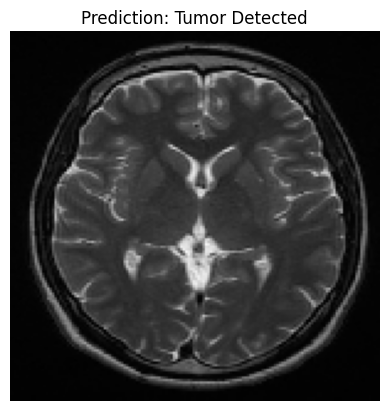

In [40]:
# Get a list of all images in the validation directory
healthy_dir = os.path.join(validation_dir, 'healthy')
tumor_dir = os.path.join(validation_dir, 'Tumor')

# Create a list of all image paths
healthy_images = [os.path.join(healthy_dir, f) for f in os.listdir(healthy_dir)]
tumor_images = [os.path.join(tumor_dir, f) for f in os.listdir(tumor_dir)]
all_images = healthy_images + tumor_images

# Randomly select an image
random_image_path = random.choice(all_images)
print(f'Selected Image: {random_image_path}')
# Load and preprocess the image
img_array = load_and_preprocess_image(random_image_path)
# Make a prediction
prediction = model.predict(img_array)

# Output the prediction
if prediction[0][0] > 0.5:
    print("Prediction: Tumor Detected")
else:
    print("Prediction: No Tumor Detected")
# Load the image for visualization
img = load_img(random_image_path, target_size=(150, 150))

# Plot the image
plt.imshow(img)
plt.axis('off')
plt.title("Prediction: Tumor Detected" if prediction[0][0] > 0.5 else "Prediction: No Tumor Detected")
plt.show()
